In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def gradEs(xk, yk, xkp1, ykp1, l_k, k):
    """
    Calculate the gradient of the stretching energy with respect to the coordinates.

    Args:
    - xk (float): x coordinate of the current point
    - yk (float): y coordinate of the current point
    - xkp1 (float): x coordinate of the next point
    - ykp1 (float): y coordinate of the next point
    - l_k (float): reference length
    - EA (float): elastic modulus

    Returns:
    - F (np.array): Gradient array
    """
    F = np.zeros(4)
    F[0] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (-2.0 * xkp1 + 2.0 * xk)
    F[1] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (-0.2e1 * ykp1 + 0.2e1 * yk)
    F[2] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * xkp1 - 0.2e1 * xk)
    F[3] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * ykp1 - 0.2e1 * yk)

    F = 0.5 * k * l_k * F  # Scale by k and l_k

    return F

In [18]:
def hessEs(xk, yk, xkp1, ykp1, l_k, k):
    """
    This function returns the 4x4 Hessian of the stretching energy E_k^s with
    respect to x_k, y_k, x_{k+1}, and y_{k+1}.
    """
    J = np.zeros((4, 4))  # Initialize the Hessian matrix
    J11 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J12 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (-2 * ykp1 + 2 * yk) / 0.2e1
    J13 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * xkp1 - 2 * xk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J14 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J22 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J23 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * xkp1 - 2 * xk) / 0.2e1
    J24 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * ykp1 - 2 * yk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J33 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * xkp1 - 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J34 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (2 * xkp1 - 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (2 * xkp1 - 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J44 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * ykp1 - 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k

    J = np.array([[J11, J12, J13, J14],
                   [J12, J22, J23, J24],
                   [J13, J23, J33, J34],
                   [J14, J24, J34, J44]])

    J *= 0.5 * k * l_k

    return J

In [19]:
%%writefile nodes.txt
0, 0
1, 0
2, 0
1, -1

Overwriting nodes.txt


In [20]:
%%writefile springs.txt
0, 1, 10
1, 2, 20
0, 3, 5
2, 3, 5

Overwriting springs.txt


In [21]:
#Load Network
nodes = np.loadtxt('nodes.txt', delimiter=',')
springs_data = np.loadtxt('springs.txt', delimiter=',')
num_nodes = len(nodes)
m = 1.0
fixed_nodes = [0, 2]
free_nodes = [i for i in range(num_nodes) if i not in fixed_nodes]

In [22]:
#Spring
def rest_length(i, j):
    return np.linalg.norm(nodes[i] - nodes[j])

springs = [(int(i), int(j), k, rest_length(int(i), int(j)))
           for i, j, k in springs_data]



In [23]:
# Read the nodes, springs
nodes_file_path = 'nodes.txt'
node_coordinates = []

with open(nodes_file_path, 'r') as f:
    for line in f:
        parts = [part.strip() for part in line.split(',')]
        if len(parts) == 2:
            node_coordinates.append([float(parts[0]), float(parts[1])])

node_matrix = np.array(node_coordinates)
print("Node coordinates:")
print(node_matrix)




springs_file_path = 'springs.txt'
index_info = []
stiffness_info = []

with open(springs_file_path, 'r') as f:
    for line in f:
        parts = [part.strip() for part in line.split(',')]
        if len(parts) == 3:
            i, j, k = int(parts[0]), int(parts[1]), float(parts[2])
            index_info.append([2*i, 2*i+1, 2*j, 2*j+1])
            stiffness_info.append(k)

index_matrix = np.array(index_info)
stiffness_matrix = np.array(stiffness_info)
print("Spring indices:\n", index_matrix)
print("Spring stiffnesses:\n", stiffness_matrix)


Node coordinates:
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 1. -1.]]
Spring indices:
 [[0 1 2 3]
 [2 3 4 5]
 [0 1 6 7]
 [4 5 6 7]]
Spring stiffnesses:
 [10. 20.  5.  5.]


In [24]:
# Equations of motion and Jacobian
def getFexternal(m):
    """Gravity force vector"""
    W = np.zeros_like(m)
    for i in range(len(m)//2):
        W[2*i+1] = m[2*i+1] * (-9.8)
    return W

def getForceJacobian(x_new, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k):
    """Return residual vector f and Jacobian J"""
    ndof = x_new.shape[0]
    f_inertia = m/dt * ((x_new - x_old)/dt - u_old)
    J_inertia = np.diag(m) / dt**2

    f_spring = np.zeros_like(x_new)
    J_spring = np.zeros((ndof, ndof))
    for i in range(stiffness_matrix.shape[0]):
        ind = index_matrix[i].astype(int)
        xi, yi, xj, yj = x_new[ind[0]], x_new[ind[1]], x_new[ind[2]], x_new[ind[3]]
        stiffness = stiffness_matrix[i]
        f_spring[ind] += gradEs(xi, yi, xj, yj, l_k[i], stiffness)
        J_spring[np.ix_(ind, ind)] += hessEs(xi, yi, xj, yj, l_k[i], stiffness)

    f_ext = getFexternal(m)
    f = f_inertia + f_spring - f_ext
    J = J_inertia + J_spring
    return f, J


In [25]:
# Preparation at t = 0
N = node_matrix.shape[0]
ndof = 2 * N
x_old = np.zeros(ndof)
u_old = np.zeros(ndof)
for i in range(N):
    x_old[2*i] = node_matrix[i][0]
    x_old[2*i+1] = node_matrix[i][1]

l_k = np.zeros_like(stiffness_matrix)
for i in range(stiffness_matrix.shape[0]):
    ind = index_matrix[i].astype(int)
    xi, yi, xj, yj = x_old[ind[0]], x_old[ind[1]], x_old[ind[2]], x_old[ind[3]]
    l_k[i] = np.sqrt((xj - xi)**2 + (yj - yi)**2)

# mass and weight
m = np.ones(ndof)
W = getFexternal(m)

In [26]:
# Simulation Loop

def myInt(t_new, x_old, u_old, free_DOF, stiffness_matrix, index_matrix, m, dt):
    x_new = x_old.copy()
    eps = 1e-6
    err = eps * 100
    while err > eps:
        f, J = getForceJacobian(x_new, x_old, u_old, stiffness_matrix, index_matrix, m, dt, l_k)
        J_free = J[np.ix_(free_DOF, free_DOF)]
        f_free = f[free_DOF]
        deltaX_free = np.linalg.solve(J_free, f_free)
        deltaX = np.zeros_like(x_new)
        deltaX[free_DOF] = deltaX_free
        x_new = x_new - deltaX
        err = np.linalg.norm(f_free)
    u_new = (x_new - x_old) / dt
    return x_new, u_new


In [27]:
# Plotting functions

def plot(x, index_matrix, t):
    plt.figure()
    plt.title(f'Time: {t:.2f} s')
    for i in range(index_matrix.shape[0]):
        ind = index_matrix[i].astype(int)
        xi, yi = x[ind[0]], x[ind[1]]
        xj, yj = x[ind[2]], x[ind[3]]
        plt.plot([xi, xj], [yi, yj], 'bo-')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

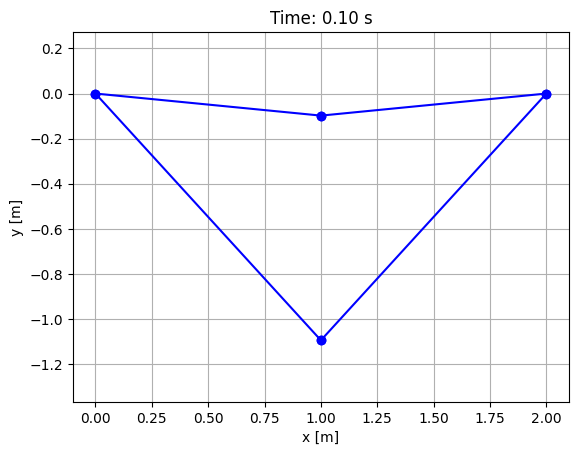

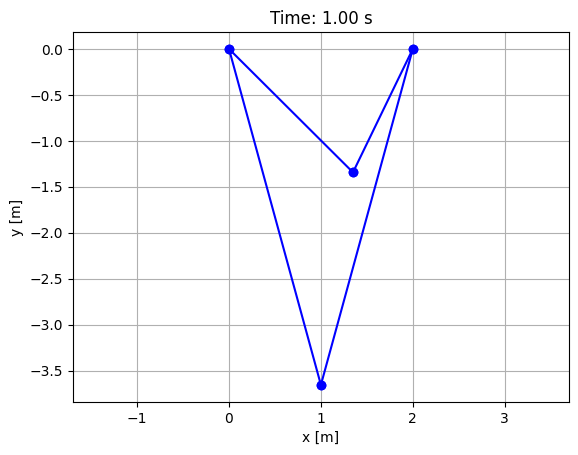

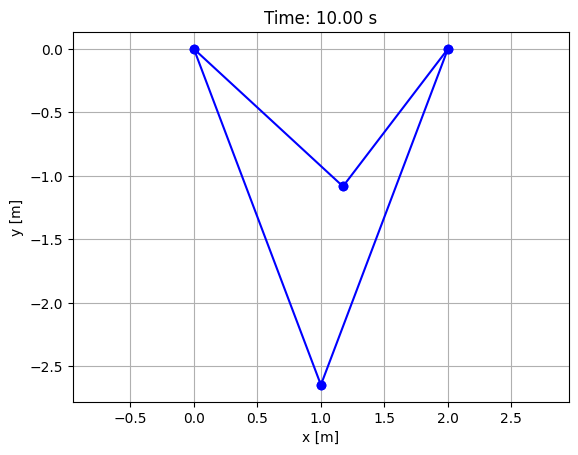

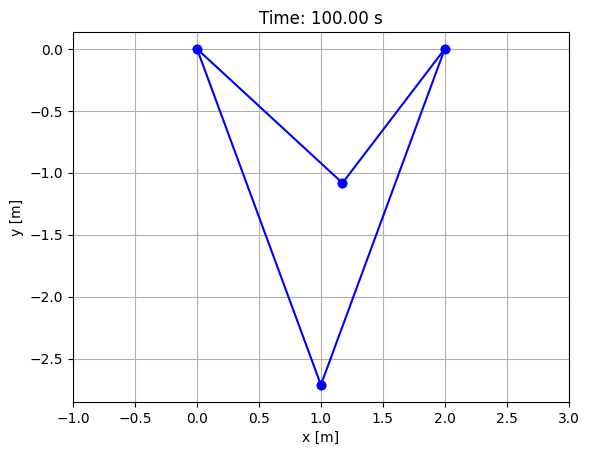

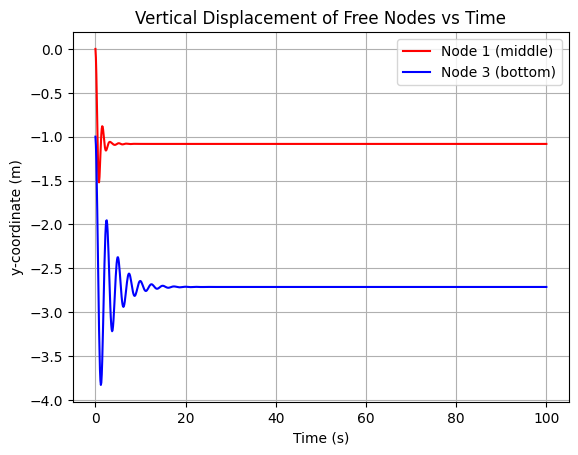

In [28]:
# Main simulation loop

dt = 0.1
maxTime = 100
t = np.arange(0, maxTime + dt, dt)

# Fixed nodes: 0 and 2
fixed_DOF = [0, 1, 4, 5]
free_DOF = np.setdiff1d(np.arange(ndof), fixed_DOF)

y_node1 = np.zeros(len(t))
y_node3 = np.zeros(len(t))
y_node1[0] = x_old[3]
y_node3[0] = x_old[7]

for k in range(len(t)-1):
    t_new = t[k+1]
    x_new, u_new = myInt(t_new, x_old, u_old, free_DOF, stiffness_matrix, index_matrix, m, dt)
    if np.isclose(t_new, 0.0) or np.isclose(t_new, 0.1) or np.isclose(t_new, 1.0) or np.isclose(t_new, 10.0) or np.isclose(t_new, 100.0):
        plot(x_new, index_matrix, t_new)
    y_node1[k+1] = x_new[3]
    y_node3[k+1] = x_new[7]
    x_old = x_new
    u_old = u_new

# Plot of free nodes

plt.figure()
plt.plot(t, y_node1, 'r-', label='Node 1 (middle)')
plt.plot(t, y_node3, 'b-', label='Node 3 (bottom)')
plt.xlabel('Time (s)')
plt.ylabel('y-coordinate (m)')
plt.title('Vertical Displacement of Free Nodes vs Time')
plt.legend()
plt.grid(True)
plt.show()

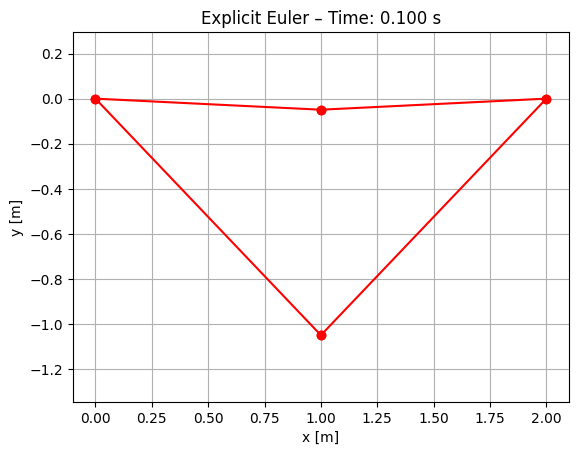

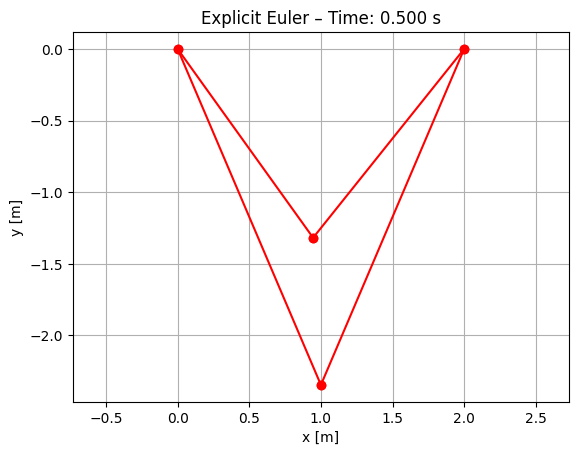

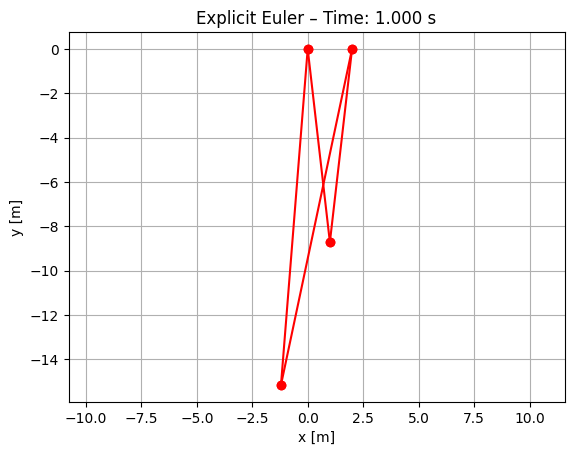

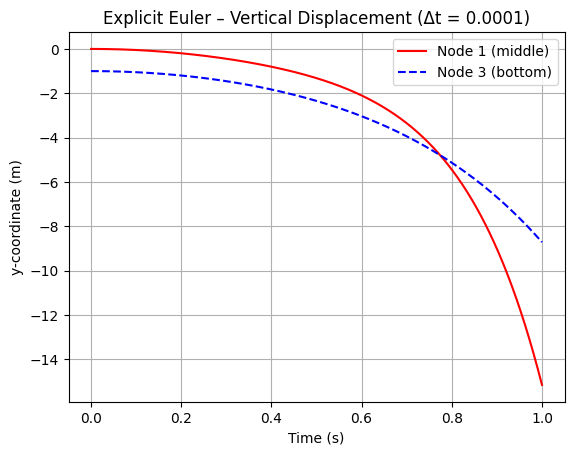

In [29]:
# EXPLICIT EULER SIMULATION

# Gradient and Hessian
def gradEs(xk, yk, xkp1, ykp1, l_k, k):
    F = np.zeros(4)
    F[0] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (-2.0 * xkp1 + 2.0 * xk)
    F[1] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (-2.0 * ykp1 + 2.0 * yk)
    F[2] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (2.0 * xkp1 - 2.0 * xk)
    F[3] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (2.0 * ykp1 - 2.0 * yk)
    F = 0.5 * k * l_k * F
    return F

# Load nodes and springs
nodes = np.loadtxt('nodes.txt', delimiter=',')
springs_data = np.loadtxt('springs.txt', delimiter=',')
num_nodes = len(nodes)
m = 1.0
fixed_nodes = [0, 2]
free_nodes = [i for i in range(num_nodes) if i not in fixed_nodes]

# Index and stiffness matrices
index_info = []
stiffness_info = []
for line in springs_data:
    i, j, k = int(line[0]), int(line[1]), float(line[2])
    index_info.append([2*i, 2*i+1, 2*j, 2*j+1])
    stiffness_info.append(k)

index_matrix = np.array(index_info)
stiffness_matrix = np.array(stiffness_info)


# External forces
def getFexternal(m):
    W = np.zeros_like(m)
    for i in range(len(m)//2):
        W[2*i+1] = m[2*i+1] * (9.8)
    return W


# Initial conditions
N = nodes.shape[0]
ndof = 2 * N
x_old = np.zeros(ndof)
u_old = np.zeros(ndof)

for i in range(N):
    x_old[2*i] = nodes[i][0]
    x_old[2*i+1] = nodes[i][1]

# Rest lengths
l_k = np.zeros_like(stiffness_matrix)
for i in range(stiffness_matrix.shape[0]):
    ind = index_matrix[i].astype(int)
    xi, yi, xj, yj = x_old[ind[0]], x_old[ind[1]], x_old[ind[2]], x_old[ind[3]]
    l_k[i] = np.sqrt((xj - xi)**2 + (yj - yi)**2)

# Mass vector
m = np.ones(ndof)
W = getFexternal(m)


# Explicit Euler integration function
def explicitEulerStep(x_old, u_old, dt, free_DOF, stiffness_matrix, index_matrix, m):
    """One step of explicit Euler integration."""
    F_spring = np.zeros_like(x_old)

    # Accumulate spring forces
    for i in range(stiffness_matrix.shape[0]):
        ind = index_matrix[i].astype(int)
        xi, yi, xj, yj = x_old[ind[0]], x_old[ind[1]], x_old[ind[2]], x_old[ind[3]]
        k_val = stiffness_matrix[i]
        F_spring[ind] += gradEs(xi, yi, xj, yj, l_k[i], k_val)

    # Add gravity
    F_ext = getFexternal(m)
    F_total = F_spring - F_ext

    # Acceleration
    a = F_total / m

    # Update velocity and position (explicit Euler)
    u_new = u_old + dt * a
    x_new = x_old + dt * u_new

    # Enforce fixed boundary conditions
    for node in fixed_nodes:
        x_new[2*node] = nodes[node][0]
        x_new[2*node+1] = nodes[node][1]
        u_new[2*node] = 0.0
        u_new[2*node+1] = 0.0

    return x_new, u_new


# Plotting function
def plot_network(x, index_matrix, t):
    plt.figure()
    plt.title(f"Explicit Euler – Time: {t:.3f} s")
    for i in range(index_matrix.shape[0]):
        ind = index_matrix[i].astype(int)
        xi, yi = x[ind[0]], x[ind[1]]
        xj, yj = x[ind[2]], x[ind[3]]
        plt.plot([xi, xj], [yi, yj], 'ro-')
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


# Main simulation loop for explicit Euler

dt = 1e-4
maxTime = 1
t = np.arange(0, maxTime + dt, dt)

fixed_DOF = [0, 1, 4, 5]
free_DOF = np.setdiff1d(np.arange(ndof), fixed_DOF)

y_node1 = np.zeros(len(t))
y_node3 = np.zeros(len(t))
y_node1[0] = x_old[3]
y_node3[0] = x_old[7]

stable = True

for k in range(len(t)-1):
    t_new = t[k+1]
    x_new, u_new = explicitEulerStep(x_old, u_old, dt, free_DOF, stiffness_matrix, index_matrix, m)

    # Check for instability
    if np.any(np.abs(x_new) > 1e6) or np.isnan(x_new).any():
        print(f"Instability detected at t = {t_new:.4f} s, Δt = {dt}")
        stable = False
        break

    # Plot selected times
    if np.isclose(t_new, 0.0) or np.isclose(t_new, 0.1) or np.isclose(t_new, 0.5) or np.isclose(t_new, 1.0):
        plot_network(x_new, index_matrix, t_new)

    # Record displacement
    y_node1[k+1] = x_new[3]
    y_node3[k+1] = x_new[7]

    # Update step
    x_old = x_new
    u_old = u_new

# Plot y-coordinate
if stable:
    plt.figure()
    plt.plot(t, y_node1, 'r-', label='Node 1 (middle)')
    plt.plot(t, y_node3, 'b--', label='Node 3 (bottom)')
    plt.xlabel('Time (s)')
    plt.ylabel('y-coordinate (m)')
    plt.title(f'Explicit Euler – Vertical Displacement (Δt = {dt})')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Simulation became unstable – try reducing Δt.")
